## Classification Predict SEPSIS

## Busines Understanding
Sepsis, formerly called sepsis, is a medical term which refers to any “generalized inflammatory response associated with a serious infection”. This lethal transmitted response occurs when the host's response to infection, systemic and severe inflammation of the body, causes damage to its own tissues and organs. It is accompanied by a cytokine shock1.(source wikipedia)


1. **Column Name	Attribute/Target	Description**
1. **ID:** N/A	Unique number to represent patient ID
2. **PRG :**	Attribute1	Plasma glucose
3. **PL :** Attribute 2	Blood Work Result-1 (mu U/ml)
4. **PR :**	Attribute 3	Blood Pressure (mm Hg)
5. **SK :**	Attribute 4	Blood Work Result-2 (mm)
6. **TS :**	Attribute 5	Blood Work Result-3 (mu U/ml)
7. **M11 :**	Attribute 6	Body mass index (weight in kg/(height in m)^2
8. **BD2 :**	Attribute 7	Blood Work Result-4 (mu U/ml)
9. **Age :**	Attribute 8	patients age (years)
10. **Insurance :**	N/A	If a patient holds a valid insurance card
11. **Sepsis :**	Target	Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise


Goal : 
1. Build a Machine Learning to predict Sepsis 
2. Build API using Fast API to embed the ML  built

#### Hypothesis
1. **Null :** There is relationship between sepsis and PRG (Plasma /glucose)
2. **ALTERNATIVE :** There is no relationship between sepsis and PRG


#### ANALYTIQUE QUESTION
1. Is sepsis caused by a low variation in plasma?

2. Does age have an impact on sepsis?

3. What is the impact of blood pressure on sepsis?

### Data Understanding

### Installation

In [498]:
%pip install xgboost


### Importation

In [630]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns

# EDA (pandas-profiling, etc. )
 

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )


# Other packages
import os, pickle
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




### Data Loading

In [500]:
data = pd.read_csv('Paitients_Files_Train.csv')
data

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [501]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [502]:
#Let's try to explore our dataset in more detail
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


We have a maximum of 846 and a minimum of 0. There is something to check here

In [503]:
#Now let's check if our data is clean
data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [504]:
data.duplicated().sum()

0

We are not a missing value and no duplicated value

In [505]:
#Let's delete our ID column
data = data.drop(columns=['ID'],axis=1)
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [506]:
data.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [507]:
#Let's check unique value 
data['Sepssis'].unique()

array(['Positive', 'Negative'], dtype=object)

In [508]:
data['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

We are 391 Negativea people and 208 positives

In [509]:
data['Insurance'].unique()


array([0, 1], dtype=int64)

In [510]:
data['Age'].max()

81

In [511]:
data.shape

(599, 10)

We are 599 rows and 10 columns

### Univariant Analysis

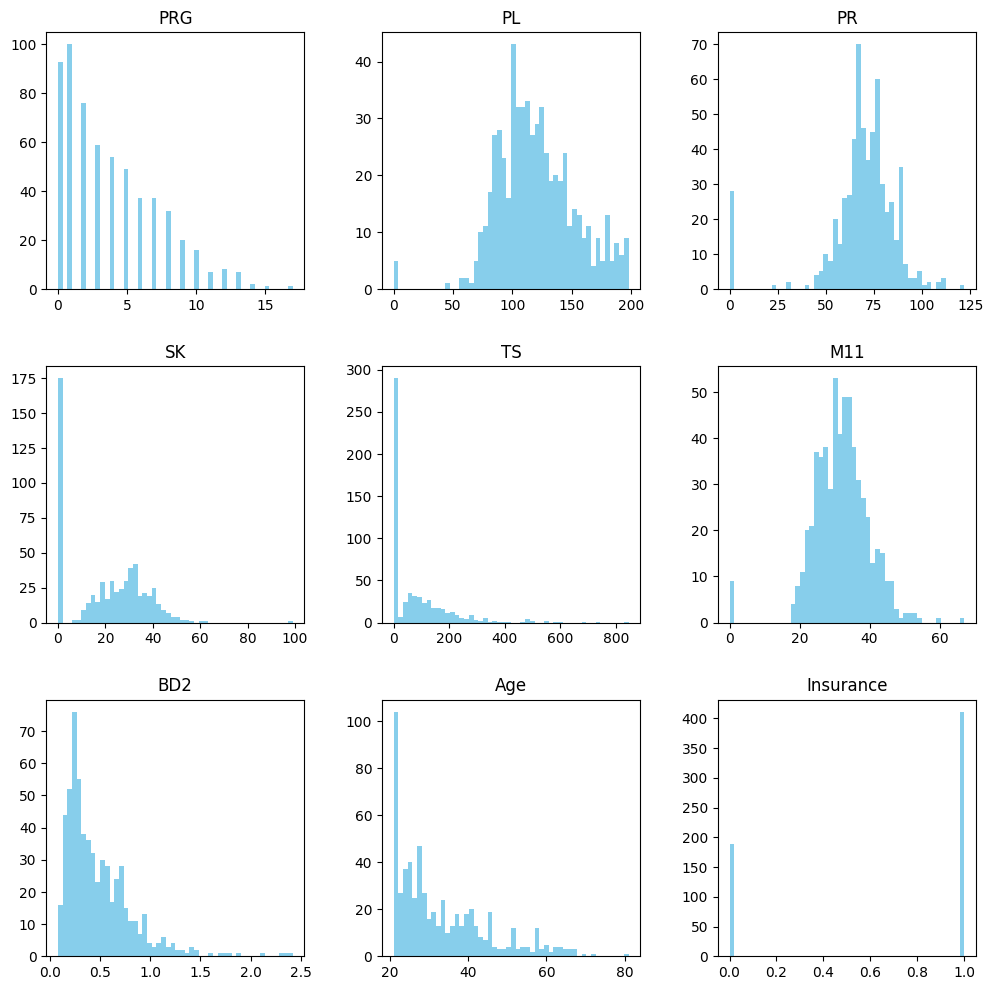

In [512]:
## let's use hist to display our data
data.hist(figsize=(12,12),grid=False,bins=50,color='skyblue')
plt.show()


individuals with very low plasma levels and young age are more likely to have sepsis
The same also applies to individuals who have insurance.
Let's try to see in much more detail.

#### Visualization Sepssis

<Axes: xlabel='Sepssis'>

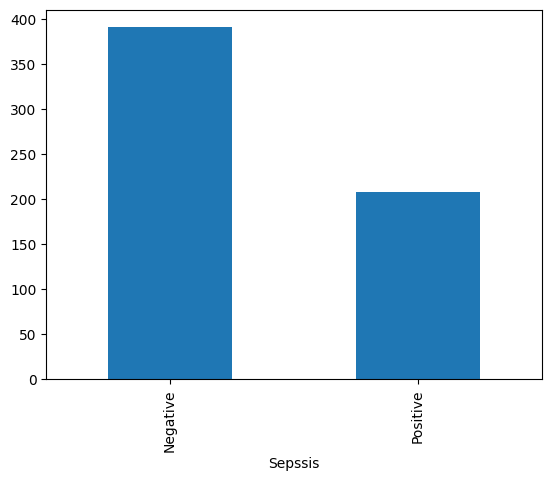

In [513]:
data['Sepssis'].value_counts().plot(kind='bar')


Note that the number of positive cases is greater than the negative cases.

<Axes: xlabel='Insurance'>

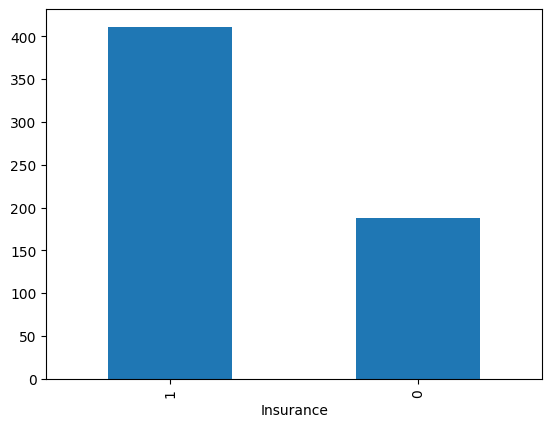

In [514]:
data['Insurance'].value_counts().plot(kind='bar')


Note that the number of positive cases is greater than the negative cases.It's same for Insurance column

In [515]:
data.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [516]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


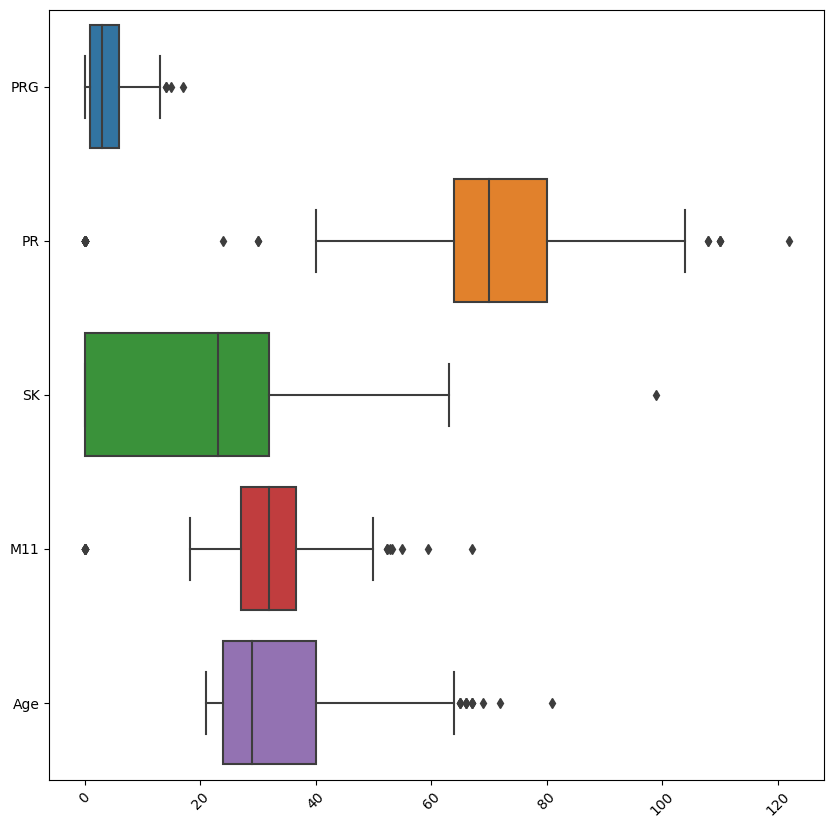

In [517]:
data_without = data.drop(['BD2','Insurance','TS','PL'],axis=1)
plt.figure(figsize=(10,10))
sns.boxplot(data_without,orient='h')
plt.xticks(rotation=45)
plt.show()

<Axes: >

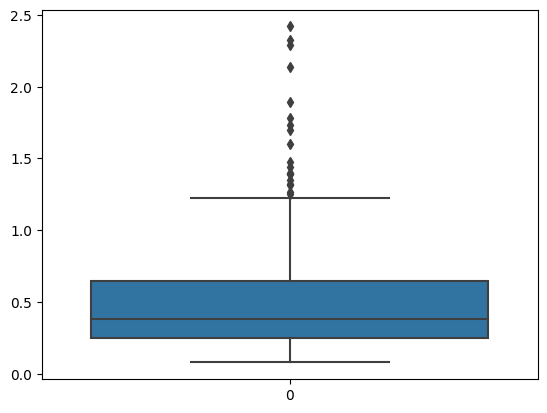

In [518]:
sns.boxplot(data['BD2'])

<Axes: >

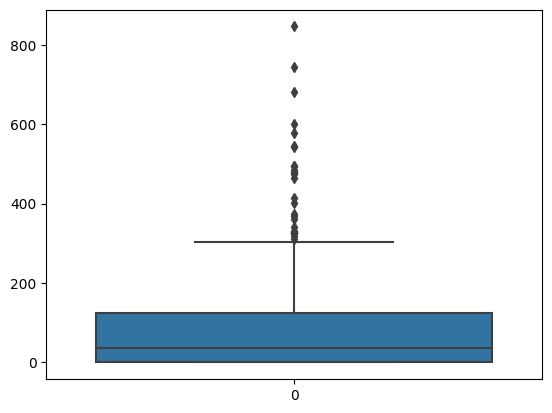

In [519]:
sns.boxplot(data['TS'])

###### We practically have outliers on all of our columns in our dataset. For example for PR here we see data above the max value Which is the same for the PR, the SE, the M11 and the age. For age also we see that there are elderly patients who have been consulted by the seepsis for example 5 whose age range is from 65 to 85 years

##### Bi-variante Analysis

In [520]:
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [521]:
df =data.copy()

In [522]:
# Convert 'Sepssssi' column to numeric for visualization

df['Sepssis'] = df['Sepssis'].map({'Positive': 1, 'Negative': 0})

<Axes: >

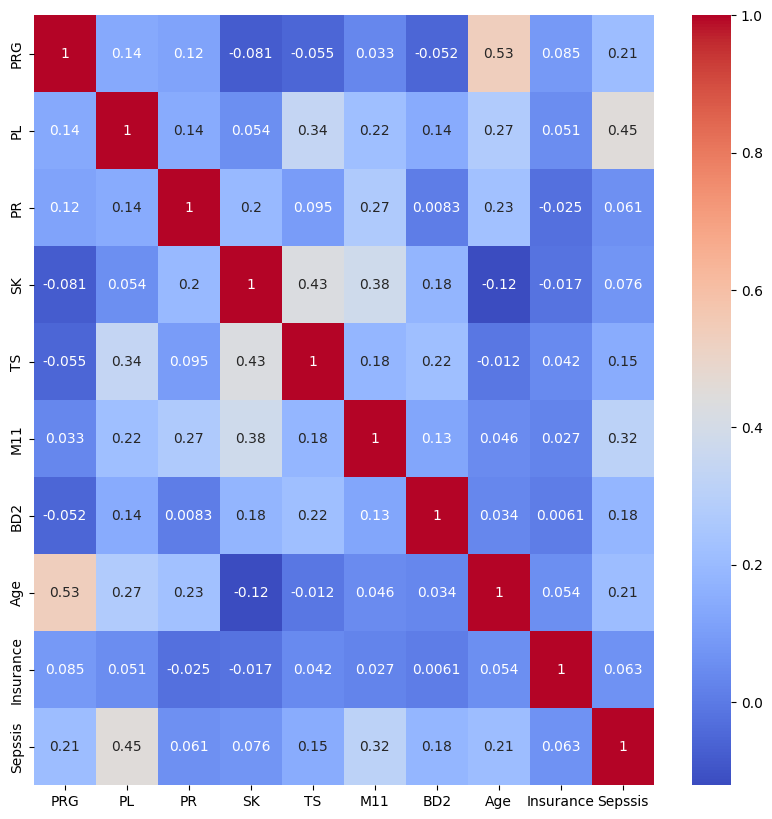

In [523]:
correlation_matrix =df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

##### We have a low correlation between our values. We can say only age and PRG have a relationship with 0.53 which is not really very important.And we are 0.45 for PL and Sepssis

### Multilvariante Analysis

In [524]:
#let's check our columns
df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


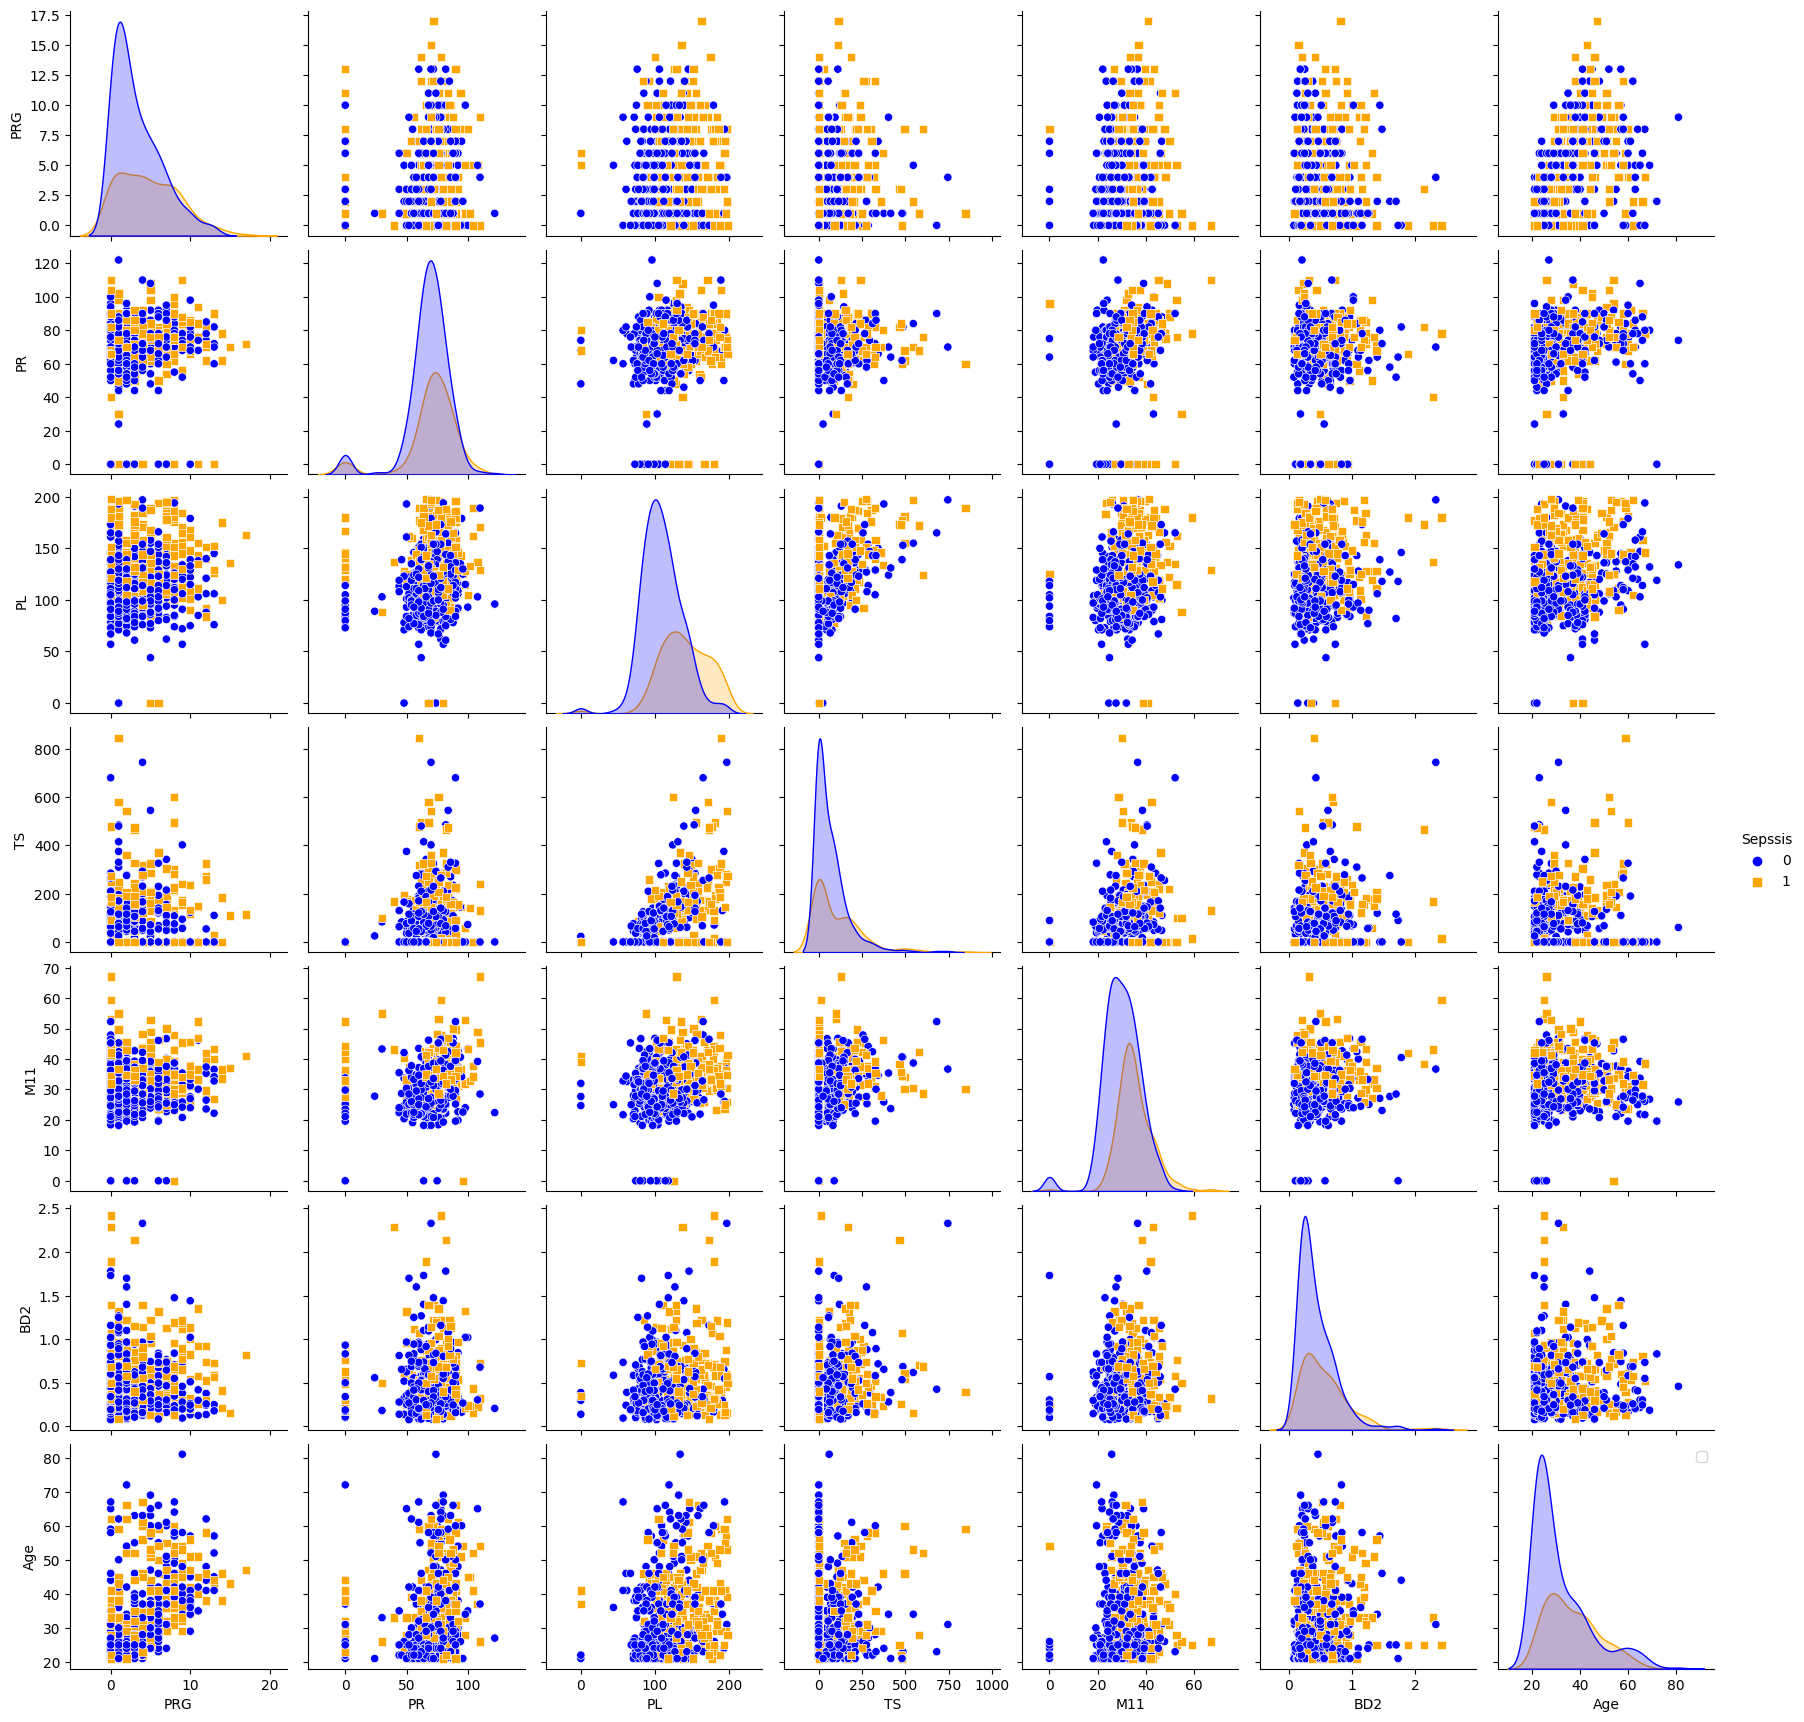

In [525]:
#Let 's choose some columns
columns_to_plot = ['PRG','PR', 'PL', 'TS', 'M11', 'BD2', 'Age', 'Sepssis']


# Select only the relevant columns for the pair plot
data_pair = df[columns_to_plot]

# Create a pair plot
sns.pairplot(data_pair, hue='Sepssis', markers=["o", "s"], palette={0: 'blue', 1: 'orange'})
plt.legend()
plt.show()


#### ANSWER ANALYTIQUE QUESTIONS
1. Is sepsis caused by a low variation in plasma (PRG)?




In [526]:
df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,0
595,0,188,82,14,185,32.0,0.682,22,1,1
596,0,67,76,0,0,45.3,0.194,46,1,0
597,1,89,24,19,25,27.8,0.559,21,0,0


In [527]:
df['Sepssis']

0      1
1      0
2      1
3      0
4      1
      ..
594    0
595    1
596    0
597    0
598    1
Name: Sepssis, Length: 599, dtype: int64

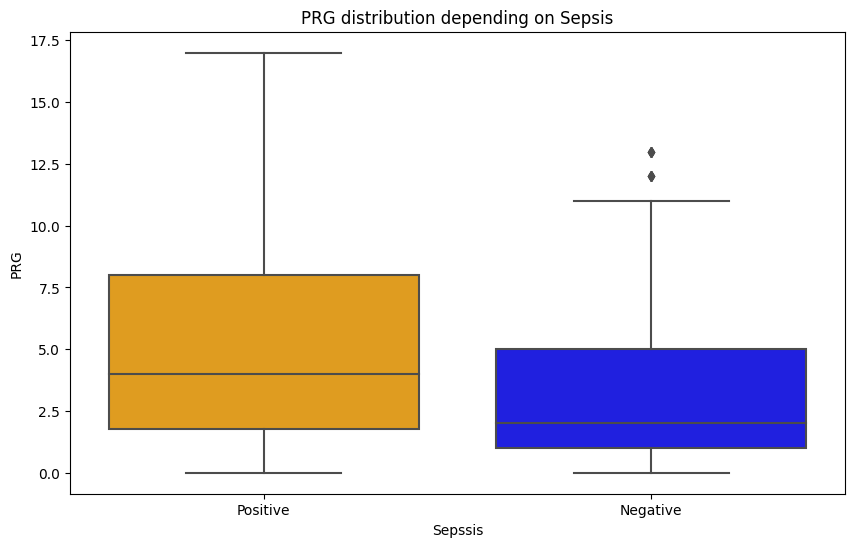

In [528]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='PRG', data=data, palette={'Negative': 'blue', 'Positive': 'orange'})
plt.title('PRG distribution depending on Sepsis')
plt.show()


An increasing trend in PRG variation is observed for patients with sepsis.
On the other hand, we observe outliers for no sespis patients despite the PRG rates being high.

2. Does Age have an impact on sepsis?

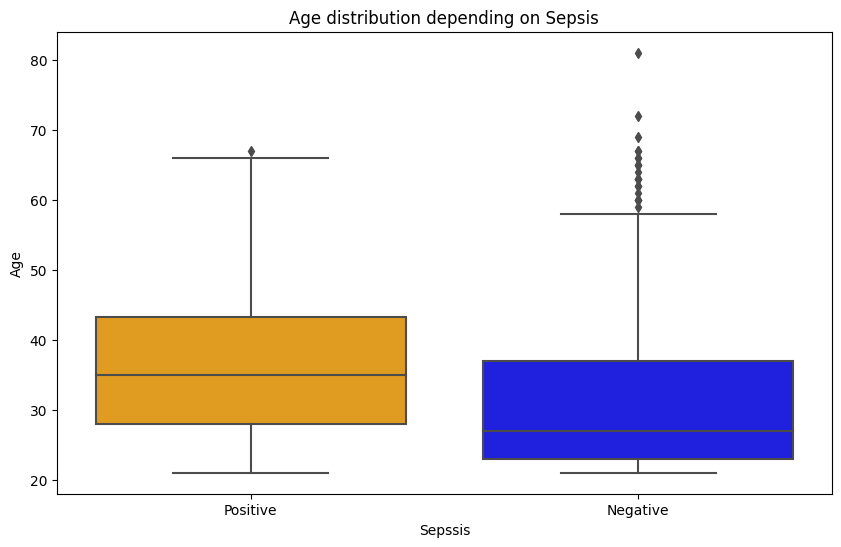

In [529]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='Age', data=data, palette={'Negative': 'blue', 'Positive': 'orange'})
plt.title('Age distribution depending on Sepsis')
plt.show()

The average age of sepsis patients is 35. We have a sepsis patient over 60 years old.
We also see that there are a good number of older people who do not have sepsis, as do many young people.
In reality, age plays a determining role for sepsis patients.

3. What is the impact of blood pressure on sepsis?

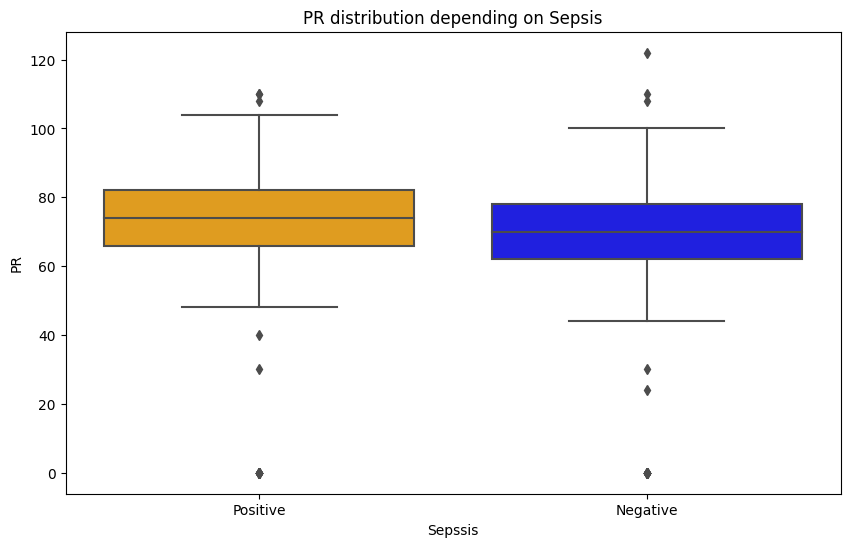

In [530]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='PR', data=data, palette={'Negative': 'blue', 'Positive': 'orange'})
plt.title('PR distribution depending on Sepsis')
plt.show()

There is no statistical evidence of a significant difference in PR between classes of Sepsis.

## Data Preparation

In [531]:
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [532]:
data_pepeline = data.copy()

In [533]:
data_pepeline.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


Let's create a row age column to classify the ages by brackets

In [534]:
#let's create an age range for our age column
age_range = ["({0}-{1})".format(age,age+10) for age in range(20,100,10)]
age_range

['(20-30)',
 '(30-40)',
 '(40-50)',
 '(50-60)',
 '(60-70)',
 '(70-80)',
 '(80-90)',
 '(90-100)']

In [535]:
## Reproduce and use pandas dataframe
data_pepeline['age_range'] = pd.cut(x=data_pepeline['Age'], bins=8, labels=age_range) 
data_pepeline

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,age_range
0,6,148,72,35,0,33.6,0.627,50,0,Positive,(50-60)
1,1,85,66,29,0,26.6,0.351,31,0,Negative,(30-40)
2,8,183,64,0,0,23.3,0.672,32,1,Positive,(30-40)
3,1,89,66,23,94,28.1,0.167,21,1,Negative,(20-30)
4,0,137,40,35,168,43.1,2.288,33,1,Positive,(30-40)
...,...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative,(30-40)
595,0,188,82,14,185,32.0,0.682,22,1,Positive,(20-30)
596,0,67,76,0,0,45.3,0.194,46,1,Negative,(50-60)
597,1,89,24,19,25,27.8,0.559,21,0,Negative,(20-30)


In [536]:
data_pepeline['age_range'].value_counts()

age_range
(20-30)     280
(30-40)     122
(40-50)      90
(50-60)      47
(60-70)      30
(70-80)      24
(80-90)       5
(90-100)      1
Name: count, dtype: int64

In [537]:
### Let's delete our age column
data_pipe_new = data_pepeline.drop('Age',axis=1)
data_pipe_new

,PRG,PL,PR,SK,TS,M11,BD2,Insurance,Sepssis,age_range
0,6,148,72,35,0,33.6,0.627,0,Positive,(50-60)
1,1,85,66,29,0,26.6,0.351,0,Negative,(30-40)
2,8,183,64,0,0,23.3,0.672,1,Positive,(30-40)
3,1,89,66,23,94,28.1,0.167,1,Negative,(20-30)
4,0,137,40,35,168,43.1,2.288,1,Positive,(30-40)
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,0,Negative,(30-40)
595,0,188,82,14,185,32.0,0.682,1,Positive,(20-30)
596,0,67,76,0,0,45.3,0.194,1,Negative,(50-60)
597,1,89,24,19,25,27.8,0.559,0,Negative,(20-30)


Features Encoding

In [538]:
encoder =LabelEncoder()
data_pipe_new['age_range']=encoder.fit_transform(data_pipe_new['age_range'])

In [539]:
X =data_pipe_new.drop('Sepssis',axis=1)
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Insurance,age_range
0,6,148,72,35,0,33.6,0.627,0,3
1,1,85,66,29,0,26.6,0.351,0,1
2,8,183,64,0,0,23.3,0.672,1,1
3,1,89,66,23,94,28.1,0.167,1,0
4,0,137,40,35,168,43.1,2.288,1,1


In [540]:
y=data_pipe_new['Sepssis']
y.head()

0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: Sepssis, dtype: object

## Create Pipeline

In [541]:
# Create a pipeline 
input_features =X.columns
input_features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Insurance', 'age_range'], dtype='object')

In [559]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler',StandardScaler(),input_features),
        ('log_transformer',FunctionTransformer(np.log1p),input_features)
    ]
)



Split Our train dataset

In [560]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

In [561]:

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


### Check how balanced  data 

In [562]:
y_train.value_counts()

Sepssis
Negative    313
Positive    166
Name: count, dtype: int64

### Machine Learning Modeling

#### Model KNN

Create the Model

In [606]:
neightbors = KNeighborsClassifier()
pipeline =Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('neightbors',neightbors)
])

Train the Model KNN

In [607]:
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Insurance', 'age_range'], dtype='object')),
                                                 ('log_transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Insurance', 'age_range'], dtype='object'))])),
                ('neightbors', KNeighborsClassifier())])

Predict

In [608]:
knn_pred =pipeline.predict(X_test)


In [625]:
from sklearn.metrics import classification_report,accuracy_score
accuracy_knn = accuracy_score(y_test_encoded, knn_pred)
print(f"Accuracy: {accuracy_knn}")
print(classification_report(y_test_encoded,knn_pred))


Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.76      0.83      0.80        78
           1       0.63      0.52      0.57        42

    accuracy                           0.73       120
   macro avg       0.70      0.68      0.68       120
weighted avg       0.72      0.72      0.72       120



### Model LR

In [624]:
LR =LogisticRegression(solver='lbfgs',multi_class='auto')
pipeline =Pipeline(steps=[
('preprocessor',preprocessor),
('LR',LR)
])

pipeline.fit(X_train, y_train_encoded)

LR_pred =pipeline.predict(X_test)
# Check the accuracy
accuracy_lr = accuracy_score(y_test_encoded, LR_pred)
print(f"Accuracy: {accuracy_lr}")
print(classification_report(y_test_encoded,LR_pred))



Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        78
           1       0.66      0.60      0.62        42

    accuracy                           0.75       120
   macro avg       0.73      0.71      0.72       120
weighted avg       0.75      0.75      0.75       120



c:\Users\AD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model DecisionTreeClassifier

In [623]:
# Model create
DTR =DecisionTreeClassifier()
#call pipeline
pipeline =Pipeline(steps=[
('preprocessor',preprocessor),
('DTR',DTR)
])

#train the model
pipeline.fit(X_train, y_train_encoded)

#predict the model
dtr_pred =pipeline.predict(X_test)
accuracy_dtr = accuracy_score(y_test_encoded, dtr_pred)
print(f"Accuracy: {accuracy_dtr}")
print(classification_report(y_test_encoded,dtr_pred))

Accuracy: 0.7083333333333334
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        78
           1       0.59      0.55      0.57        42

    accuracy                           0.71       120
   macro avg       0.68      0.67      0.67       120
weighted avg       0.70      0.71      0.71       120



Model XGBClassifier

In [626]:
# Create a model
XGB =XGBClassifier(objective='multi:softmax', num_class=3)

## call pipeline with model
pipeline =Pipeline(steps=[
('preprocessor',preprocessor),
('XGB',XGB)
])
# train our model
pipeline.fit(X_train, y_train_encoded)

## predict the model
xbg_pred =pipeline.predict(X_test)

## print classification report
accuracy_xgb = accuracy_score(y_test_encoded, xbg_pred)
print(f"Accuracy: {accuracy_xgb}")
print(classification_report(y_test_encoded,xbg_pred))


Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        78
           1       0.57      0.57      0.57        42

    accuracy                           0.70       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.70      0.70      0.70       120



Model RandomForestClassifier

In [627]:
# Create a model
RFC =RandomForestClassifier(n_estimators=100)

## call pipeline with model
pipeline =Pipeline(steps=[
('preprocessor',preprocessor),
('RFC',RFC)
])
# train our model
pipeline.fit(X_train, y_train_encoded)

## predict the model
rfc_pred =pipeline.predict(X_test)

## print classification report
accuracy_rfc = accuracy_score(y_test_encoded, rfc_pred)
print(f"Accuracy: {accuracy_rfc}")
print(classification_report(y_test_encoded,rfc_pred))

Accuracy: 0.6916666666666667
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        78
           1       0.56      0.52      0.54        42

    accuracy                           0.69       120
   macro avg       0.66      0.65      0.66       120
weighted avg       0.69      0.69      0.69       120



Model SVC

In [631]:
# Create a model
SVC =SVC(gamma='scale')

## call pipeline with model
pipeline =Pipeline(steps=[
('preprocessor',preprocessor),
('SVC',SVC)
])
# train our model
pipeline.fit(X_train, y_train_encoded)

## predict the model
svc_pred =pipeline.predict(X_test)

## print classification report
accuracy_svc = accuracy_score(y_test_encoded, svc_pred)
print(f"Accuracy: {accuracy_svc}")
print(classification_report(y_test_encoded,svc_pred))

Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        78
           1       0.62      0.50      0.55        42

    accuracy                           0.72       120
   macro avg       0.69      0.67      0.67       120
weighted avg       0.71      0.72      0.71       120



Models comparaison

In [635]:
# Create a dictionnary accuracy
accuracy_results = {
    'SVC': accuracy_svc,
    'RandomForest': accuracy_rfc,
    'XGB' :accuracy_xgb,
    'DTR':accuracy_dtr,
    'LR':accuracy_lr,
    'KNN':accuracy_knn
}

df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# show the result
df_sorted = df.sort_values(by='Accuracy', ascending=False)
df_sorted



,Model,Accuracy
4,LR,0.750000
5,KNN,0.725000
0,SVC,0.716667
3,DTR,0.708333
2,XGB,0.700000
1,RandomForest,0.691667


We see that the LogisticRegression model has the highest accuracy with 0.75

In [633]:
confusion_matrix_rf = confusion_matrix(y_test_encoded, LR_pred)
confusion_matrix_rf

array([[65, 13],
       [17, 25]], dtype=int64)

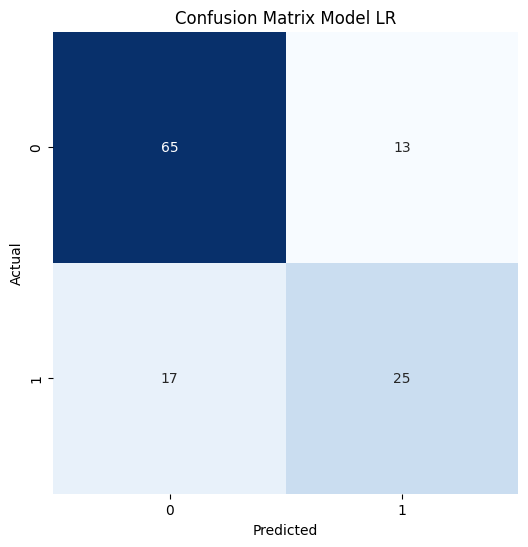

In [634]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model LR')
plt.show()


 1. 25 instances were correctly predicted as positive.
 2. 65 instances were correctly predicted as negative.
 3. 13 instances were incorrectly predicted as positive.
 4. 17 instances were incorrectly predicted as negative

Hyperparameters tuning

Export key components

In [636]:
import joblib

destination = "toolkit"
#create a directory if it doesn't exist

if not os.path.exists(destination):
    os.makedirs(destination)
#Create a dictionary  to store the object and their filename
    models ={
        "scaler":StandardScaler(),
        "encoder":encoder,
        "model_final": LR
    }

#Loop through the model and save them using joblib.dump()
for name,model in models.items():
    file_path =os.path.join(destination,f"{name}.joblib")
    joblib.dump(model,file_path)

In [637]:
#Exporting the requirements
requirements ="\n".join(f"{m.__name__}=={m.__version__}" for m in globals().values() if getattr(m,"__version__",None))

with open("requirements.txt","w") as f:
    f.write(requirements)